<a href="https://colab.research.google.com/github/lemurchik65/VfhECz15082000/blob/master/HW_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = np.expand_dims(x_train, axis=3)
input_shape=x_train[0].shape
x_test = np.expand_dims(x_test, axis=3)
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation='relu'),
tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
tf.keras.layers.MaxPool2D(pool_size=(2,2)),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation=tf.nn.relu, padding='same'),
tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation=tf.nn.relu, padding='same'),
tf.keras.layers.MaxPool2D(pool_size=(2,2)),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.train.AdamOptimizer(0.01),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 18s 300us/sample - loss: 0.2476 - acc: 0.9266
Epoch 2/5
60000/60000 [==============================] - 18s 299us/sample - loss: 0.1116 - acc: 0.9685
Epoch 3/5
60000/60000 [==============================] - 18s 300us/sample - loss: 0.0899 - acc: 0.9759
Epoch 4/5
60000/60000 [==============================] - 18s 300us/sample - loss: 0.0787 - acc: 0.9784
Epoch 5/5
10000/10000 [==============================] - 1s 143us/sample - loss: 0.0277 - acc: 0.9915


[0.027689679413662818, 0.9915]

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
print(len(y_train))

In [0]:
m=0
from operator import itemgetter
lst1=[0]*10000
lst2=[0]*10000
lst3=[0]*10000
for tip in range(0,10000):
 # a=model.predict(x_train[tip:tip+1,:,:])[0]
  a=model.predict(x_train[tip:tip+1])[0]
  real=y_train[tip]
  for l in range(0, 10):
      if a[l]==max(a):
         k=l
         #print(k, " ", real)
  #print("khdfkbsdf")
  if k!=real:
     a_sm = tf.nn.softmax(a)
     a_loss=tf.keras.losses.sparse_categorical_crossentropy(real,a_sm)
     sess = tf.compat.v1.Session()
     a_loss = a_loss.eval(session=sess)
     sess.close()
     lst1[m]=real
     #print(lst1[m])
     lst2[m]=a_loss
     lst3[m]=tip
     m=m+1
lst=list(zip(lst1, lst2, lst3))
print(lst)
print(m)
lst.sort(key=lambda x: x[1], reverse=True)
print(lst)

[(9, 2.3193753, 80), (6, 2.4608128, 494), (3, 2.0649738, 500), (5, 2.3067412, 635), (2, 2.1645591, 854), (9, 2.1754978, 902), (2, 2.4475188, 1047), (8, 2.4587293, 1404), (5, 2.024445, 1514), (4, 2.46096, 1604), (3, 2.3920343, 1634), (9, 2.416619, 1940), (3, 1.9593703, 2098), (1, 2.4506211, 2426), (5, 2.406535, 2554), (7, 2.4053693, 2676), (3, 2.4579613, 2720), (8, 2.4178157, 2901), (7, 1.9630253, 3210), (6, 2.2257783, 3268), (1, 2.2687674, 3532), (7, 2.2493162, 3692), (9, 2.413018, 3696), (5, 1.9815267, 3907), (2, 2.2210493, 4028), (7, 2.4371493, 4334), (4, 2.4130015, 4460), (2, 2.4123955, 4476), (8, 2.1199727, 5042), (1, 2.0207186, 5174), (3, 2.3098297, 5332), (8, 2.4584627, 5338), (8, 2.4610271, 5430), (2, 2.347126, 5638), (9, 2.3061075, 5740), (2, 2.1457255, 5790), (8, 2.0501354, 5896), (9, 2.3839886, 6092), (7, 2.1360433, 6130), (3, 2.4050412, 6269), (7, 2.057678, 6315), (5, 2.111605, 6418), (4, 2.08706, 6448), (8, 2.0854905, 6582), (5, 2.123313, 6610), (5, 1.9963337, 6636), (3, 2.

In [0]:
print(lstt2)

In [0]:
lat1=[0]*m
lat2=[0]*m
lat3=[0]*m
for i in range(0, m):
  lat1[i]=lst[i][0]
  lat2[i]=lst[i][1]
  lat3[i]=lst[i][2]
print(lat2)
print(lat1)
print(lat3)



[2.4611497, 2.4610271, 2.4610143, 2.46096, 2.4608128, 2.460478, 2.4587293, 2.4584627, 2.4583724, 2.4579613, 2.4546, 2.4506211, 2.4475188, 2.4450269, 2.4444132, 2.442798, 2.4405804, 2.437259, 2.4371493, 2.4334266, 2.427306, 2.4178157, 2.416619, 2.413018, 2.4130015, 2.4123955, 2.4115872, 2.406535, 2.4053693, 2.4050412, 2.3920343, 2.3845806, 2.3839886, 2.3642445, 2.362049, 2.347126, 2.3298054, 2.3193753, 2.3098297, 2.3067412, 2.3061075, 2.2757633, 2.2687674, 2.2493162, 2.2430143, 2.2257783, 2.2213712, 2.2210493, 2.1754978, 2.1645591, 2.1457255, 2.1360433, 2.123313, 2.1199727, 2.1162043, 2.1143503, 2.111605, 2.08706, 2.0854905, 2.0808518, 2.0721347, 2.0649738, 2.057678, 2.0501354, 2.024445, 2.0207186, 1.9963337, 1.9815267, 1.9630253, 1.9593703]
[3, 8, 3, 4, 6, 8, 8, 8, 2, 3, 5, 1, 2, 3, 2, 8, 9, 2, 7, 8, 5, 8, 9, 9, 4, 2, 8, 5, 7, 3, 3, 3, 9, 1, 7, 2, 8, 9, 3, 5, 9, 8, 1, 7, 2, 6, 2, 2, 9, 2, 2, 7, 5, 8, 3, 8, 5, 4, 8, 2, 2, 3, 7, 8, 5, 1, 5, 5, 7, 3]
[7080, 5430, 8729, 1604, 494, 7136, 14

70


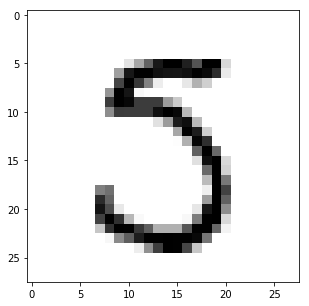

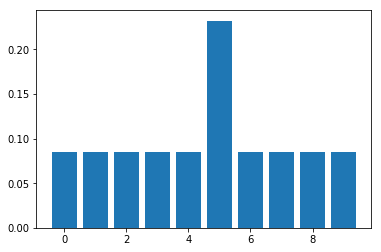

loss= 2.4611497
real= 3 





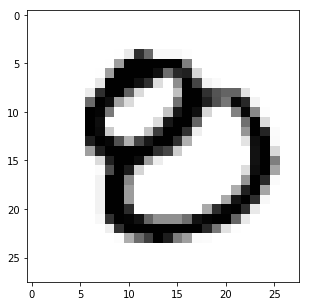

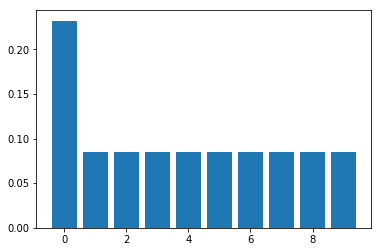

loss= 2.4610271
real= 8 





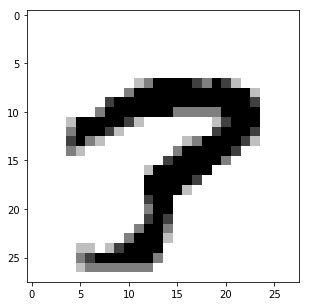

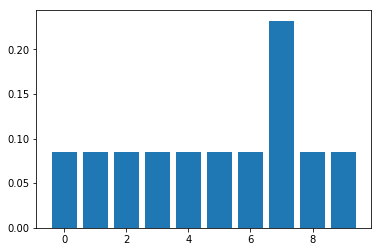

loss= 2.4610143
real= 3 





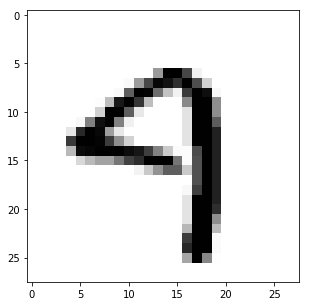

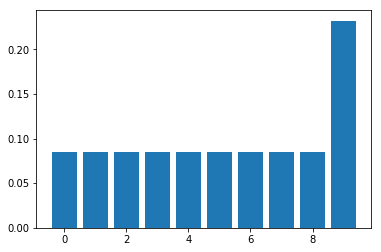

loss= 2.46096
real= 4 





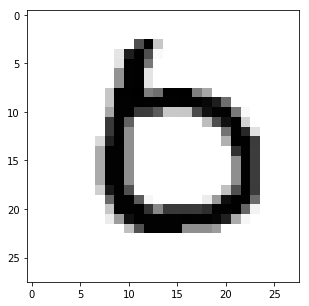

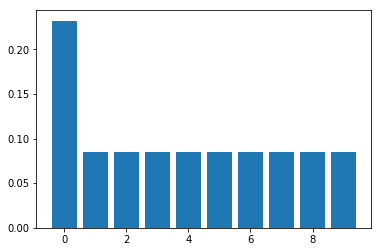

loss= 2.4608128
real= 6 





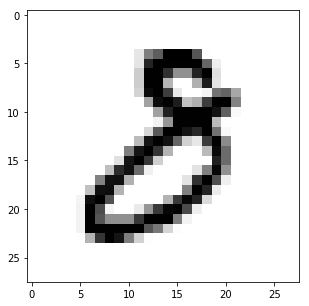

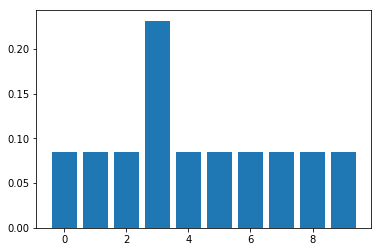

loss= 2.460478
real= 8 





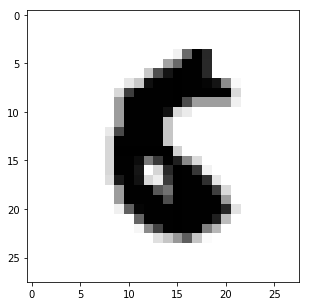

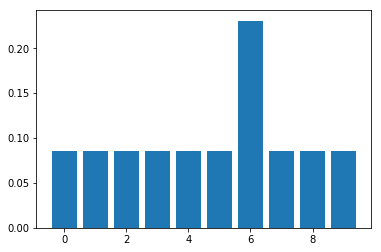

loss= 2.4587293
real= 8 





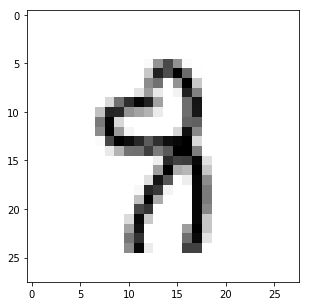

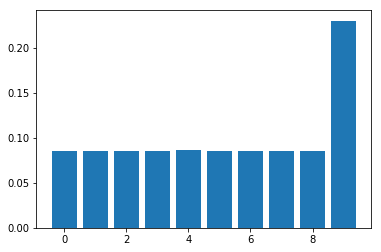

loss= 2.4584627
real= 8 





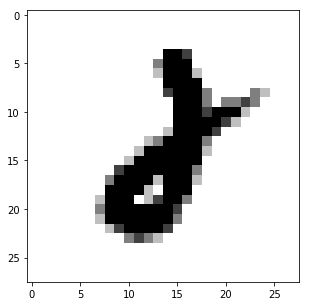

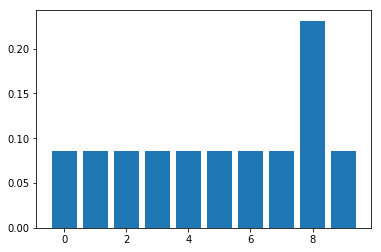

loss= 2.4583724
real= 2 





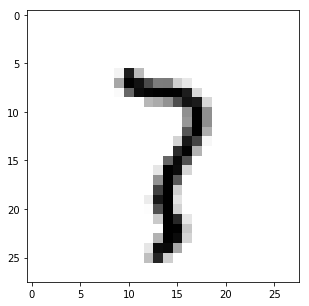

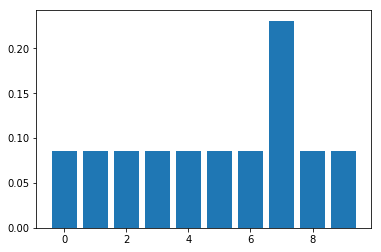

loss= 2.4579613
real= 3 





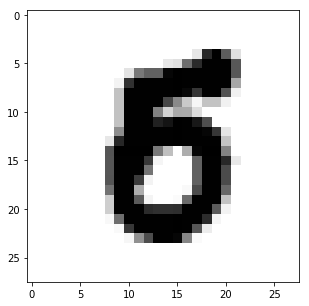

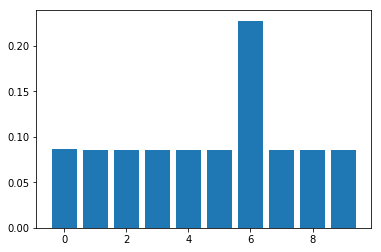

loss= 2.4546
real= 5 





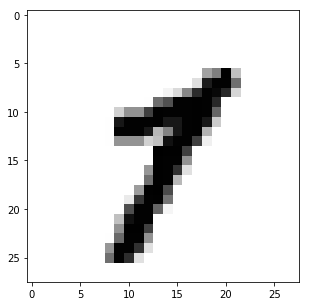

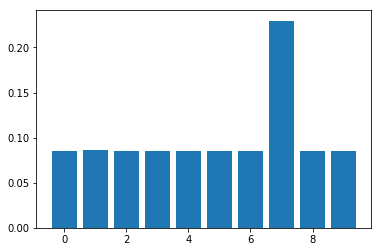

loss= 2.4506211
real= 1 





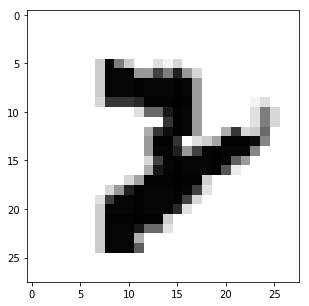

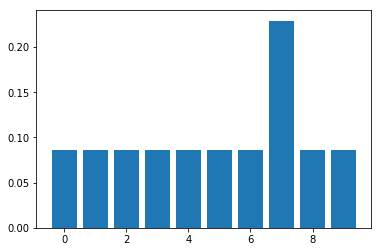

loss= 2.4475188
real= 2 





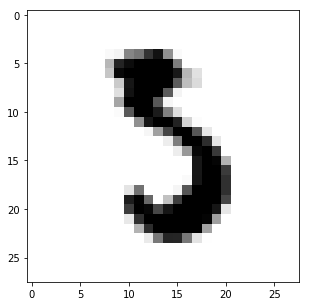

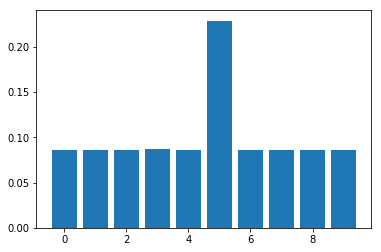

loss= 2.4450269
real= 3 





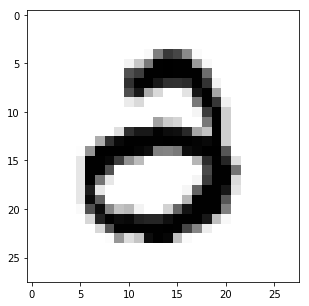

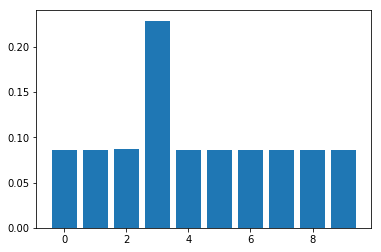

loss= 2.4444132
real= 2 





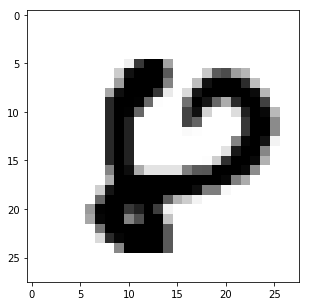

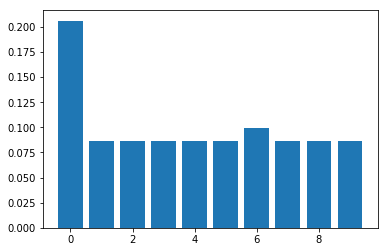

loss= 2.442798
real= 8 





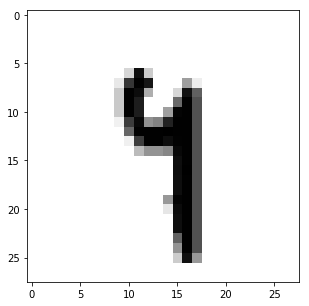

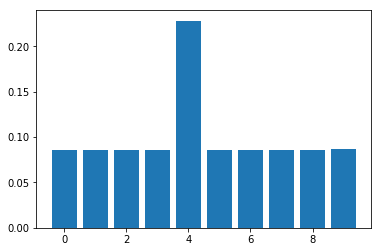

loss= 2.4405804
real= 9 





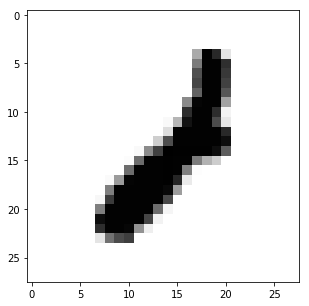

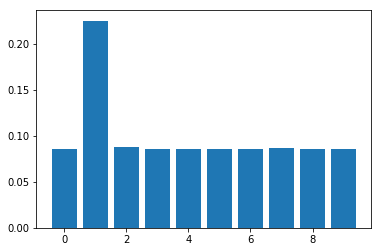

loss= 2.437259
real= 2 





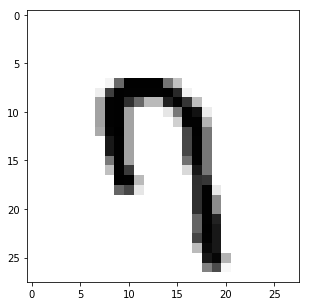

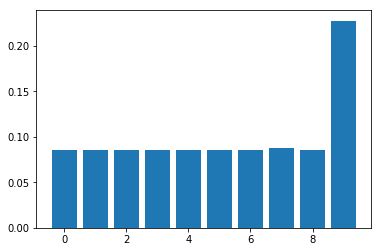

loss= 2.4371493
real= 7 





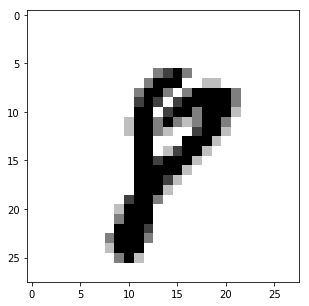

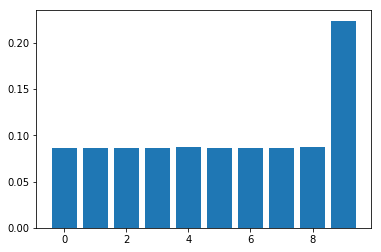

loss= 2.4334266
real= 8 





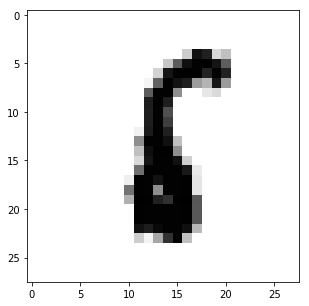

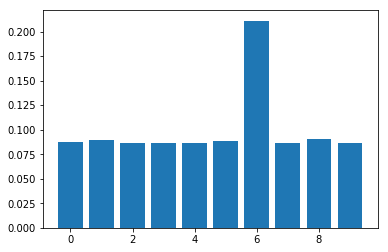

loss= 2.427306
real= 5 





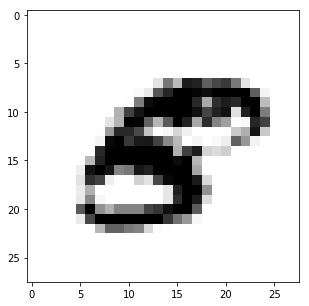

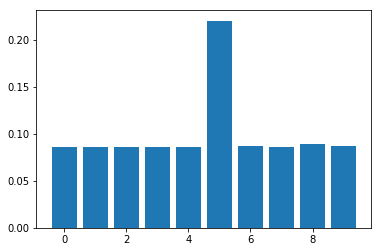

loss= 2.4178157
real= 8 





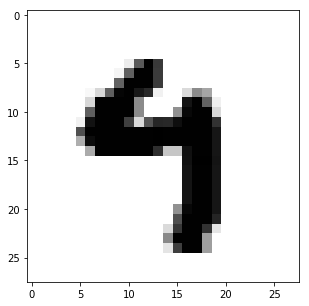

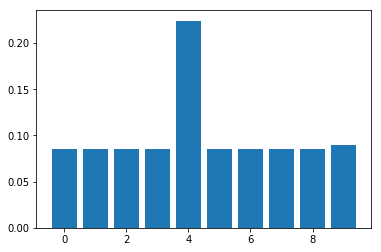

loss= 2.416619
real= 9 





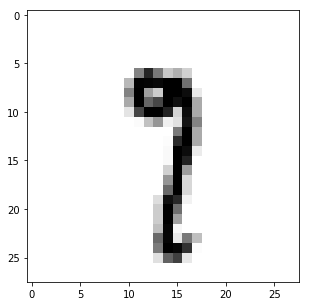

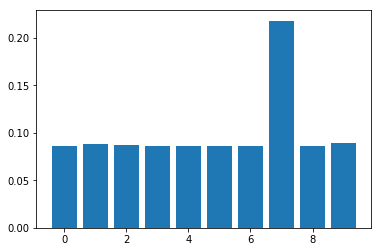

loss= 2.413018
real= 9 





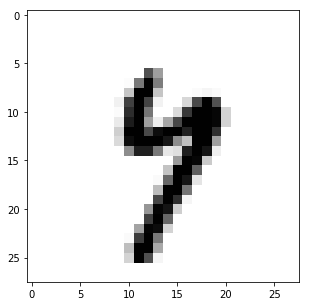

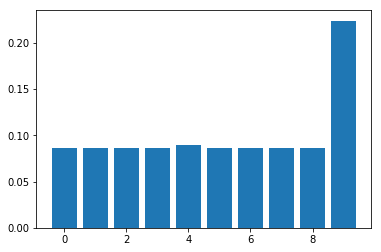

loss= 2.4130015
real= 4 





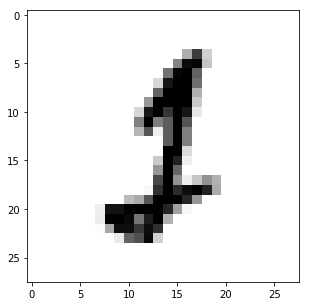

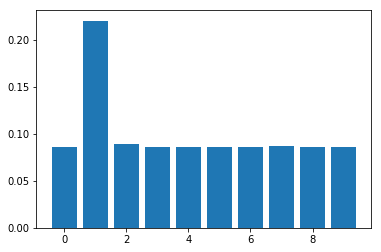

loss= 2.4123955
real= 2 





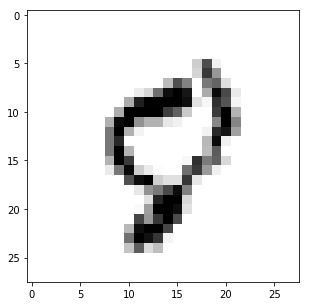

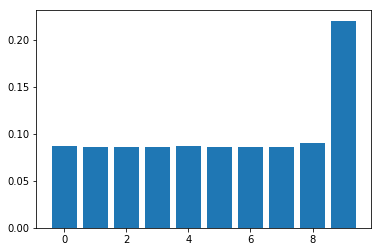

loss= 2.4115872
real= 8 





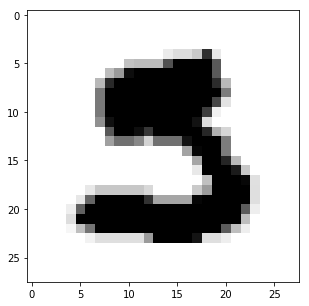

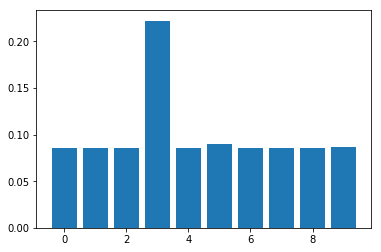

loss= 2.406535
real= 5 





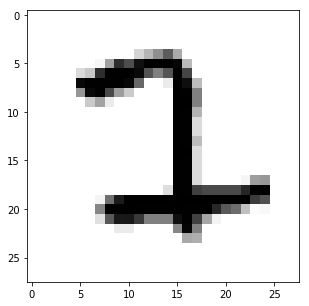

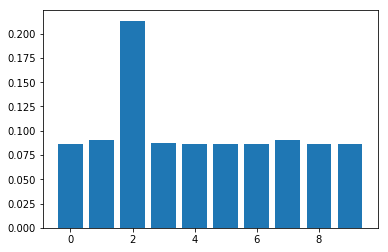

loss= 2.4053693
real= 7 





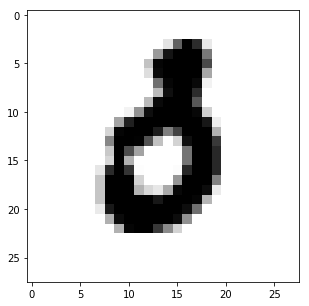

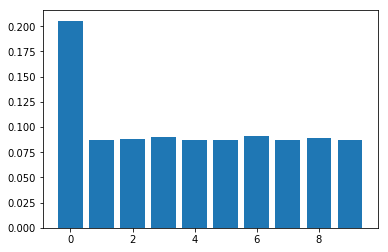

loss= 2.4050412
real= 3 





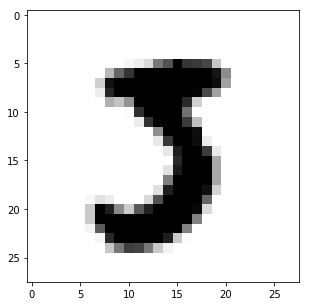

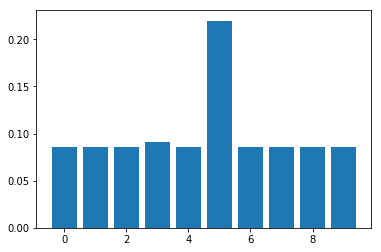

loss= 2.3920343
real= 3 





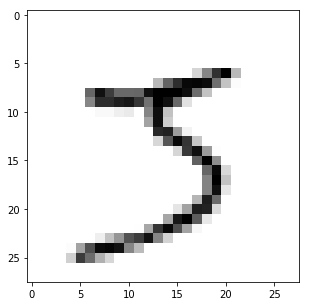

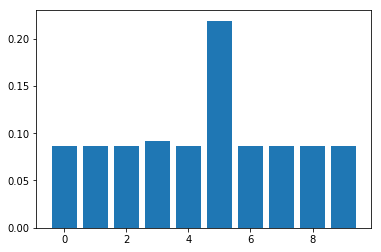

loss= 2.3845806
real= 3 





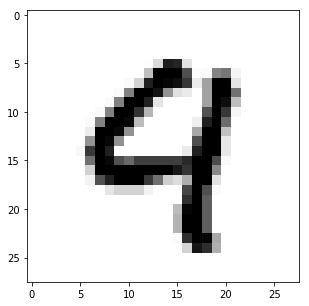

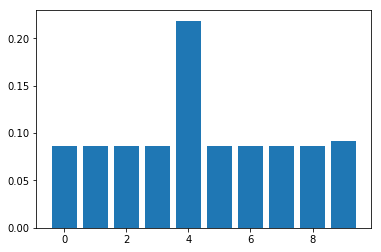

loss= 2.3839886
real= 9 





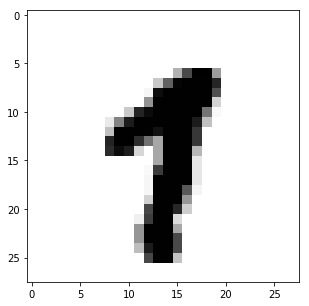

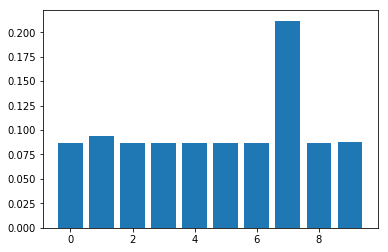

loss= 2.3642445
real= 1 





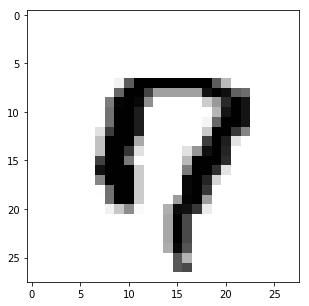

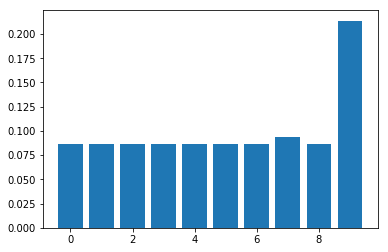

loss= 2.362049
real= 7 





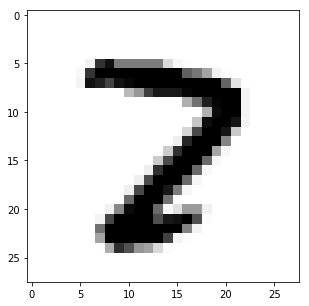

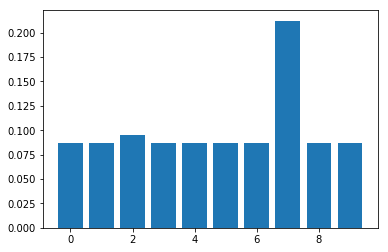

loss= 2.347126
real= 2 





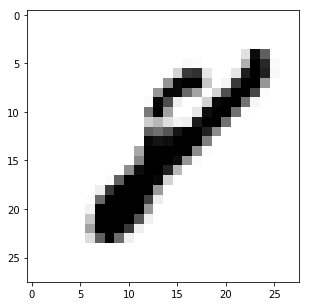

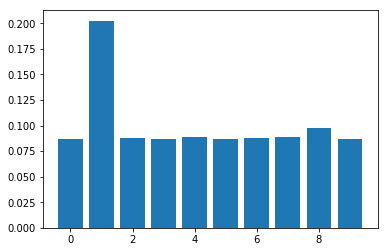

loss= 2.3298054
real= 8 





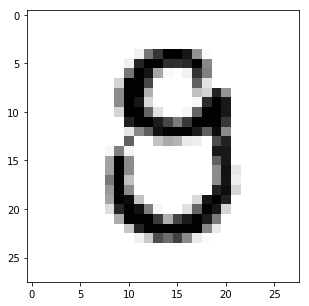

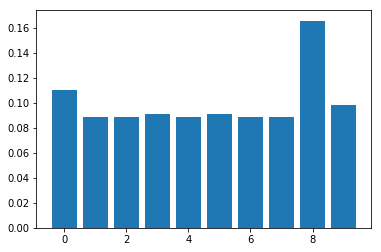

loss= 2.3193753
real= 9 





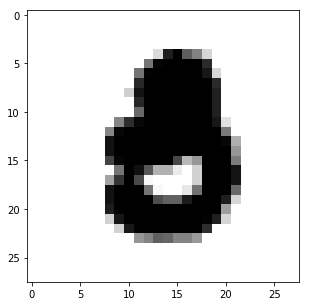

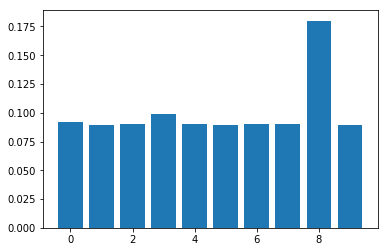

loss= 2.3098297
real= 3 





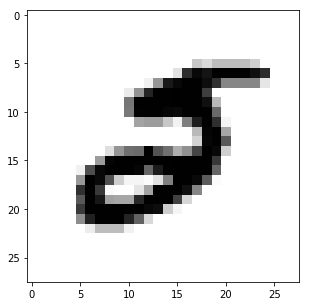

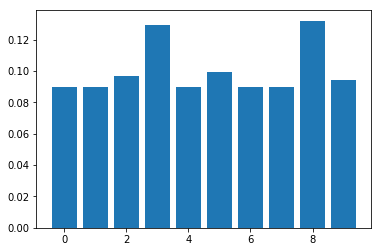

loss= 2.3067412
real= 5 





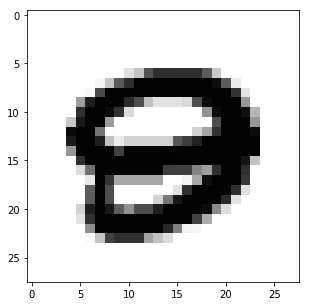

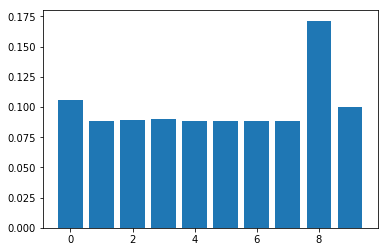

loss= 2.3061075
real= 9 





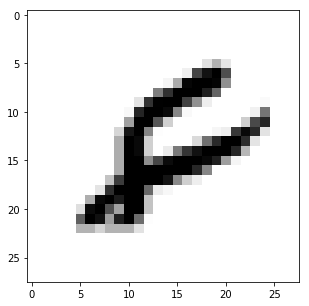

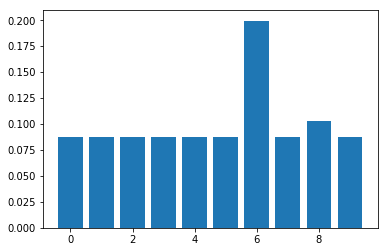

loss= 2.2757633
real= 8 





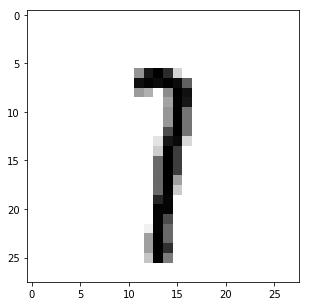

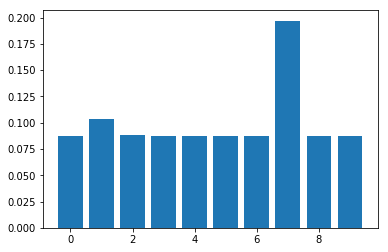

loss= 2.2687674
real= 1 





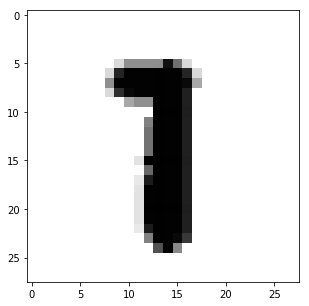

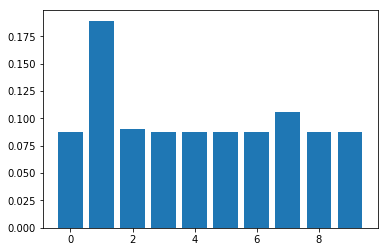

loss= 2.2493162
real= 7 





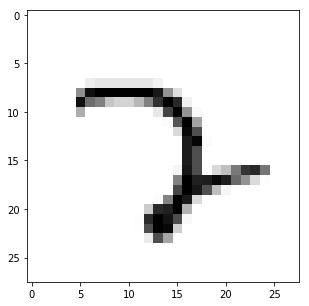

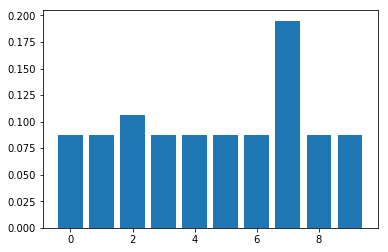

loss= 2.2430143
real= 2 





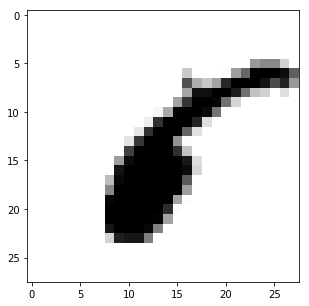

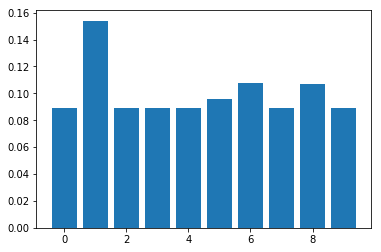

loss= 2.2257783
real= 6 





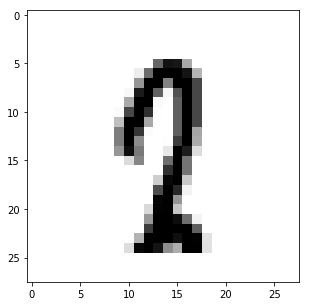

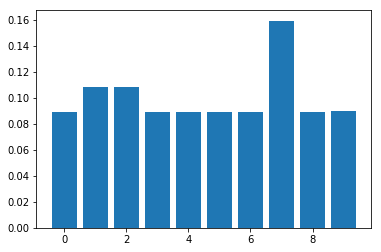

loss= 2.2213712
real= 2 





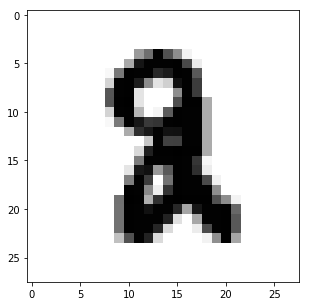

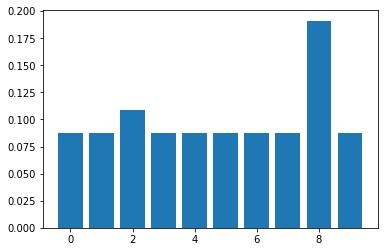

loss= 2.2210493
real= 2 





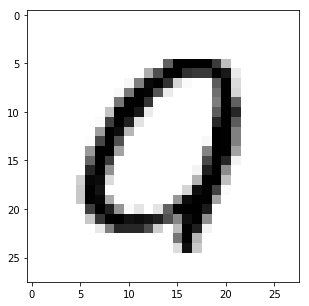

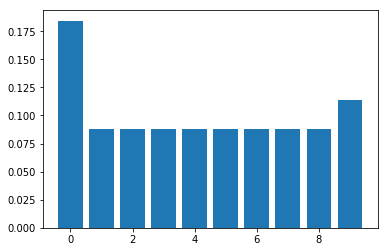

loss= 2.1754978
real= 9 





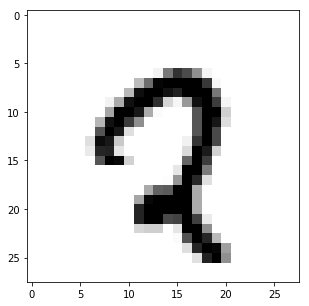

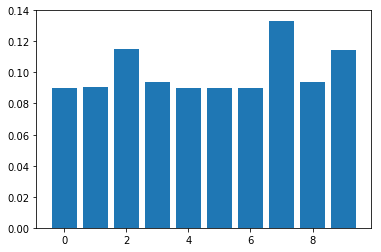

loss= 2.1645591
real= 2 





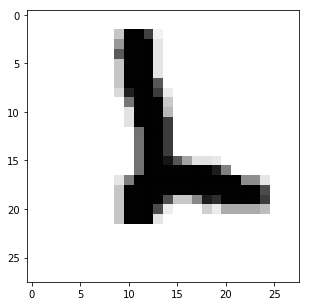

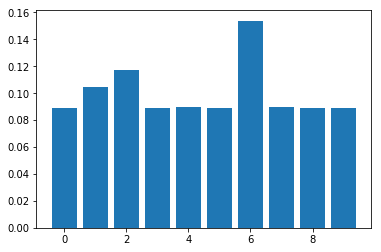

loss= 2.1457255
real= 2 





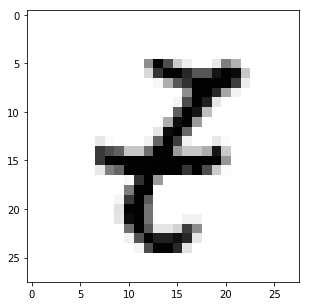

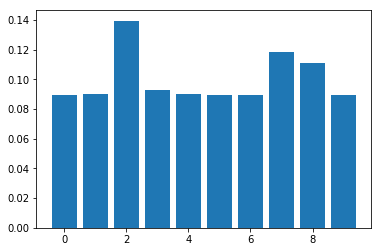

loss= 2.1360433
real= 7 





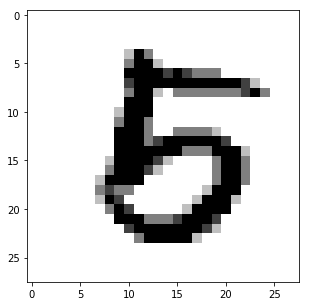

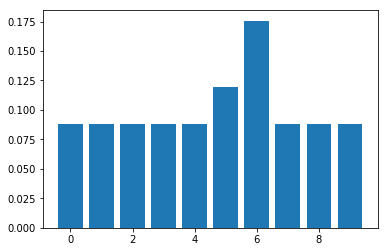

loss= 2.123313
real= 5 





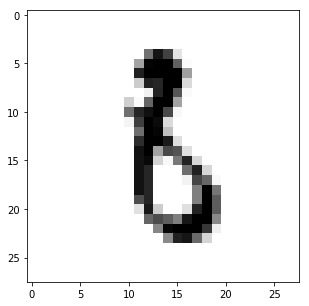

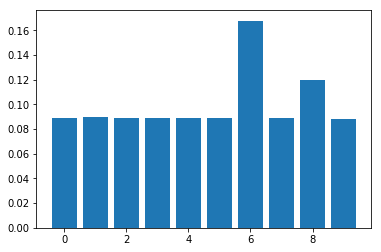

loss= 2.1199727
real= 8 





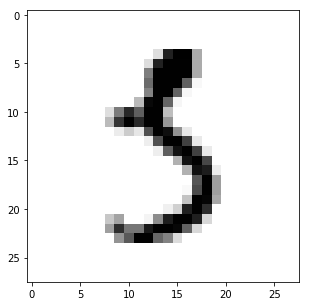

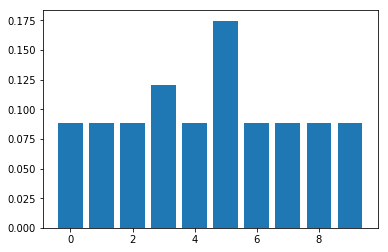

loss= 2.1162043
real= 3 





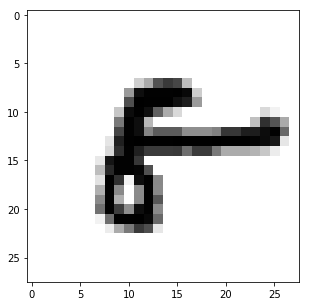

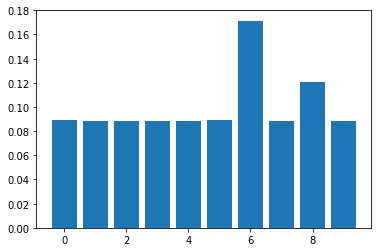

loss= 2.1143503
real= 8 





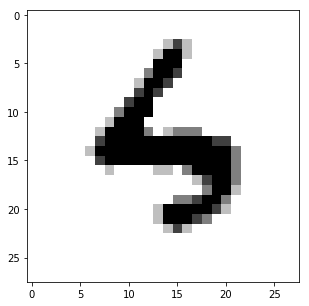

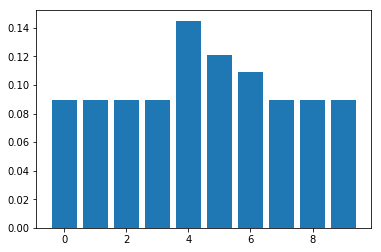

loss= 2.111605
real= 5 





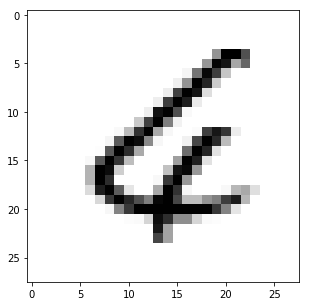

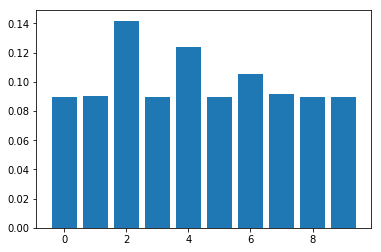

loss= 2.08706
real= 4 





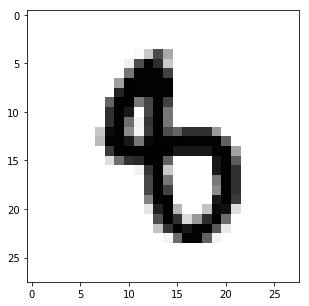

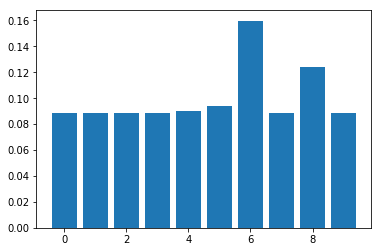

loss= 2.0854905
real= 8 





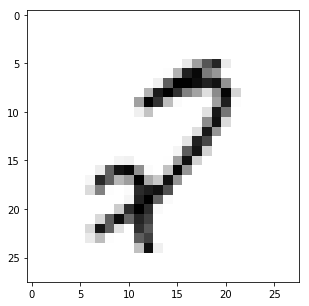

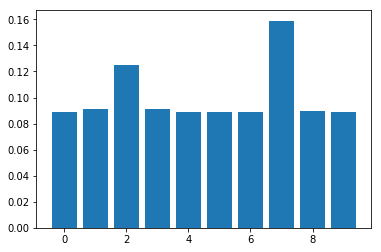

loss= 2.0808518
real= 2 





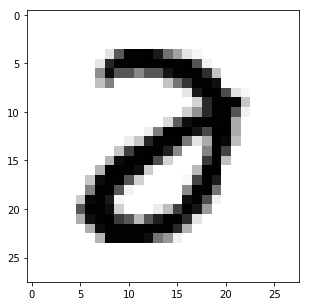

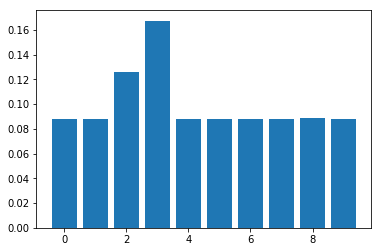

loss= 2.0721347
real= 2 





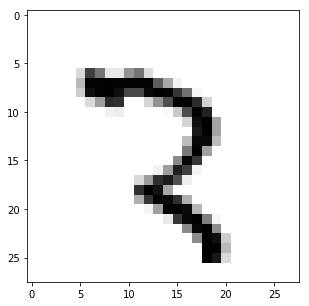

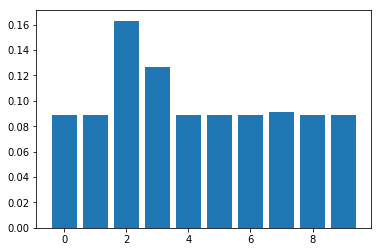

loss= 2.0649738
real= 3 





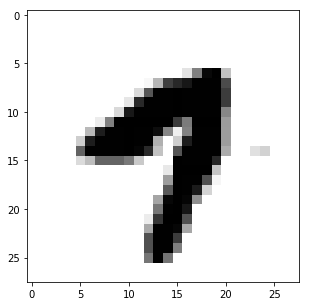

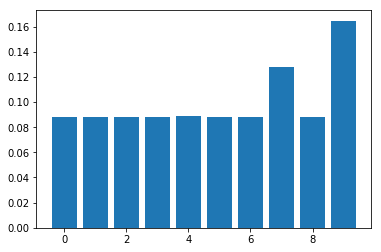

loss= 2.057678
real= 7 





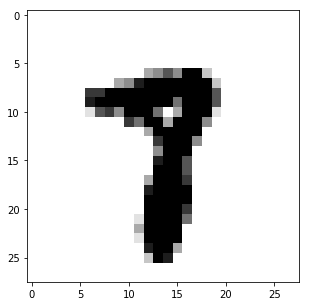

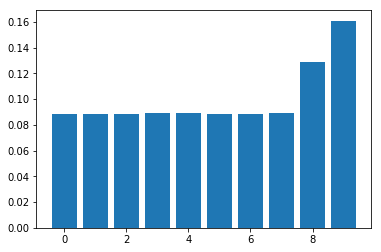

loss= 2.0501354
real= 8 





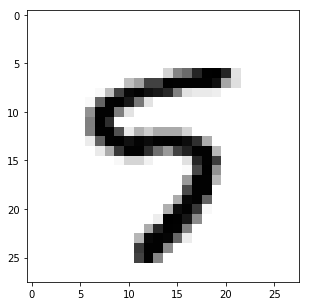

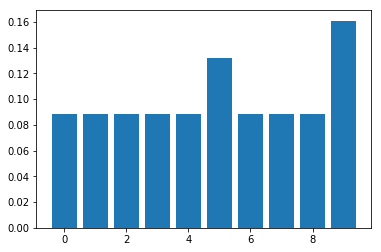

loss= 2.024445
real= 5 





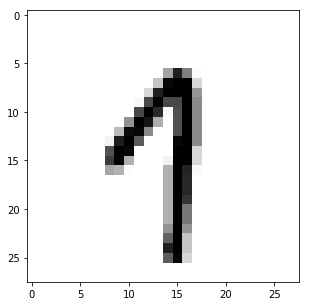

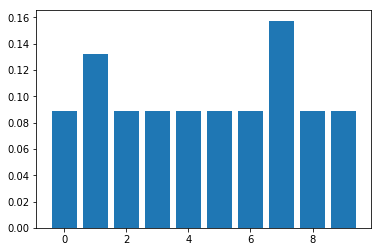

loss= 2.0207186
real= 1 





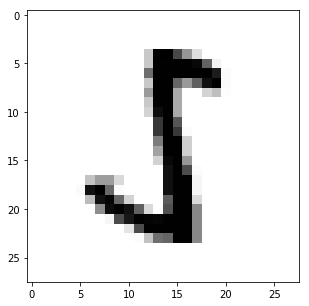

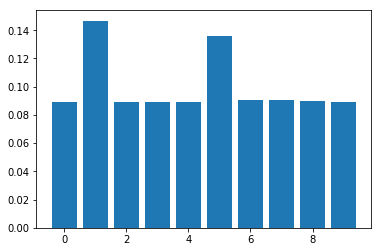

loss= 1.9963337
real= 5 





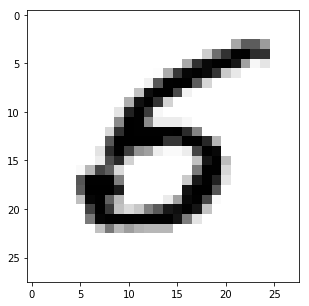

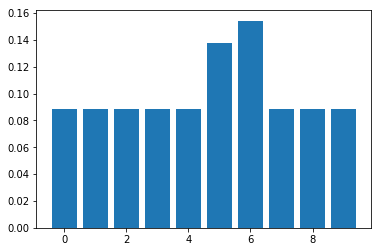

loss= 1.9815267
real= 5 





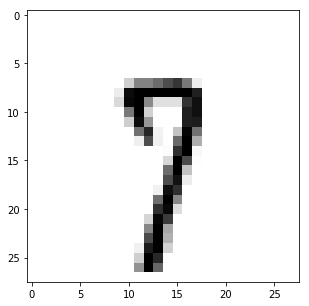

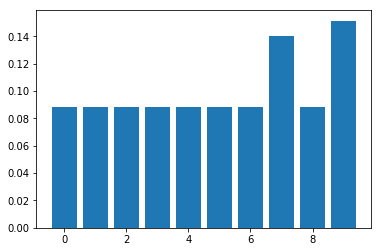

loss= 1.9630253
real= 7 





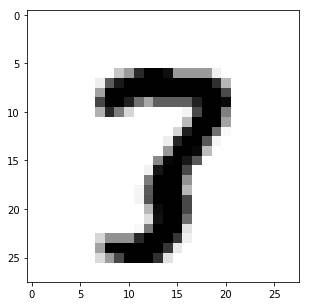

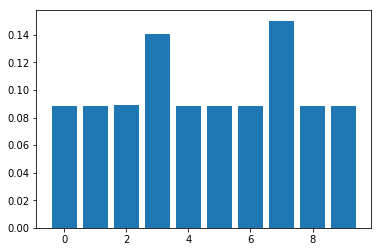

loss= 1.9593703
real= 3 





In [0]:
print(m)
for t in range(0,m):
     a=model.predict(x_train[lat3[t]:lat3[t]+1])[0]
     real=y_train[lat3[t]]
     a_sm = tf.nn.softmax(a)
     a_loss=tf.keras.losses.sparse_categorical_crossentropy(real,a_sm)
     sess = tf.compat.v1.Session()
     a_loss = a_loss.eval(session=sess)
     a_sm=a_sm.eval(session=sess)
     sess.close()
     fig=plt.figure(figsize=(5, 5))
     img = x_train[lat3[t],:,:,0]
     #fig.add_subplot(8, first_layer_activation.shape[3]/8, i+1, title="{}".format(i+1))
     plt.imshow(img, cmap='binary')
     plt.show()
     plt.bar(range(0, len(a_sm)), a_sm)
     plt.show()
     print("loss=", a_loss)
     print("real=", real, "\n\n\n")


In [0]:
print(lst1)

In [0]:
x_test = np.expand_dims(x_test, axis=3)
model.evaluate(x_test, y_test)

In [0]:
plt.title(y_train[10])
plt.imshow(x_train[10], cmap=plt.get_cmap('gray_r'))
plt.show()



In [0]:
from tensorflow.keras.models import Model
test_im = x_train[2940]
layer_outputs=[layer.output for layer in model.layers[:8]]
activation_model=Model(inputs=model.input, outputs=layer_outputs)
activations=activation_model.predict(test_im.reshape(1, 28, 28, 1))
for j in range(1,3):
    fig=plt.figure(figsize=(30, 30))
    first_layer_activation = activations[j]
    print('num lay=' , j, '\n')

    for i in range(0, first_layer_activation.shape[3]):
        img = first_layer_activation[0,:,:,i]
        fig.add_subplot(8, first_layer_activation.shape[3]/8, i+1, title="{}".format(i+1))
        plt.imshow(img)
    plt.show()


In [0]:
y_train_predict = knn.predict(x_train)
y_test_predict = knn.predict(x_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print err_train, err_test

In [0]:
model.summary()

In [0]:
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
z=model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
y=model.fit(x_train, y_train, epochs=2)
print('hhgdgghjkj')
#print(y)
model.evaluate(x_test, y_test)

In [0]:
z.shape()

In [0]:
import matplotlib.pyplot as plt

In [0]:
plt.bar(range(0, 10), y)
plt.show()